In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pickle

%matplotlib inline
mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [161]:
car=pd.read_csv('cotationprice.csv')

In [162]:
car.head()

,brand,model,year,energy,gear_box,trim,price
0,PEUGEOT,2008,2021,Electrique,Automatique,e-2008 136ch GT Pack,36 890 €
1,NISSAN,Qashqai,2020,Diesel,Manuelle,1.5 dCi 115ch N-Connecta Euro6d-T,21 890 €
2,RENAULT,Captur,2018,Essence,Manuelle,0.9 TCe 90ch energy Business Euro6c,14 999 €
3,RENAULT,Kadjar,2021,Diesel,Manuelle,1.5 Blue dCi 115ch Business - 21,23 780 €
4,PEUGEOT,2008,2018,Essence,Manuelle,1.2 PureTech 130ch Crossway S&S,16 490 €


In [163]:
car.shape

(44399, 7)

In [164]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44399 entries, 0 to 44398
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     44399 non-null  object
 1   model     44399 non-null  object
 2   year      44399 non-null  int64 
 3   energy    44390 non-null  object
 4   gear_box  44354 non-null  object
 5   trim      44394 non-null  object
 6   price     44399 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


##### Check for null values

In [165]:
car.isnull().sum()

brand        0
model        0
year         0
energy       9
gear_box    45
trim         5
price        0
dtype: int64

## Cleaning Data

#### year is an object. Change to integer

In [166]:
car['year']=car['year'].astype(np.int64)

#### Check for null values

#### convert prices to int64 and remove special char with prices that equal to zero

In [167]:
car['price'] = car['price'].str.replace(r'[^0-9]+', '', regex=True)
car['price'] = car['price'].astype(np.int64)
car = car[car['price']!=0]


In [168]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44398 entries, 0 to 44398
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     44398 non-null  object
 1   model     44398 non-null  object
 2   year      44398 non-null  int64 
 3   energy    44389 non-null  object
 4   gear_box  44353 non-null  object
 5   trim      44393 non-null  object
 6   price     44398 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


#### gear_box & Trim has nan values

In [170]:
car=car[~car['gear_box'].isna()]
car=car[~car['trim'].isna()]
car=car[~car['energy'].isna()]

In [171]:
car.shape

(44348, 7)

### check null values

In [172]:
car.isnull().sum()
car.describe()

,year,price
count,44348.000000,44348.000000
mean,2019.906084,28105.820578
std,1.699967,15195.889409
min,2009.000000,4990.000000
25%,2019.000000,17900.000000
50%,2020.000000,24900.000000
75%,2021.000000,33999.000000
max,2022.000000,269800.000000


#### Resetting the index of the final cleaned data

In [173]:
car=car.reset_index(drop=True)

## Cleaned Data

In [174]:
car

,brand,model,year,energy,gear_box,trim,price
0,PEUGEOT,2008,2021,Electrique,Automatique,e-2008 136ch GT Pack,36890
1,NISSAN,Qashqai,2020,Diesel,Manuelle,1.5 dCi 115ch N-Connecta Euro6d-T,21890
2,RENAULT,Captur,2018,Essence,Manuelle,0.9 TCe 90ch energy Business Euro6c,14999
3,RENAULT,Kadjar,2021,Diesel,Manuelle,1.5 Blue dCi 115ch Business - 21,23780
4,PEUGEOT,2008,2018,Essence,Manuelle,1.2 PureTech 130ch Crossway S&S,16490
...,...,...,...,...,...,...,...
44343,PEUGEOT,308,2022,Essence,Manuelle,PURETECH 130CH S&S BVM6 ALLURE,27800
44344,CITROËN,JUMPY,2019,Diesel,Manuelle,FGN M BLUEHDI 120 S&S BVM6 BUSINESS,20980
44345,CITROËN,C3,2020,Essence,Manuelle,PURETECH 82 S&S BVM5 FEEL BUSINESS,13980
44346,LAND,ROVER RANGE,2016,Diesel,Manuelle,MARK IV ED4 150 2WD E-CAPABILITY PURE,22990


In [175]:
car.to_csv('Cleaned_Car_data.csv')

In [176]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44348 entries, 0 to 44347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     44348 non-null  object
 1   model     44348 non-null  object
 2   year      44348 non-null  int64 
 3   energy    44348 non-null  object
 4   gear_box  44348 non-null  object
 5   trim      44348 non-null  object
 6   price     44348 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


In [177]:
car.isna().sum()

brand       0
model       0
year        0
energy      0
gear_box    0
trim        0
price       0
dtype: int64

### Checking relationship of Company with Price

In [178]:
car['brand'].unique()
car['model'].unique()
car['trim'].unique()

array(['e-2008 136ch GT Pack', '1.5 dCi 115ch N-Connecta Euro6d-T',
       '0.9 TCe 90ch energy Business Euro6c', ...,
       'LONG 950 KG BLUEHDI 130 S&S EAT8 GRIP',
       'MEGANE IV BERLINE DCI 110 ENERGY ZEN',
       'MARK IV ED4 150 2WD E-CAPABILITY PURE'], dtype=object)

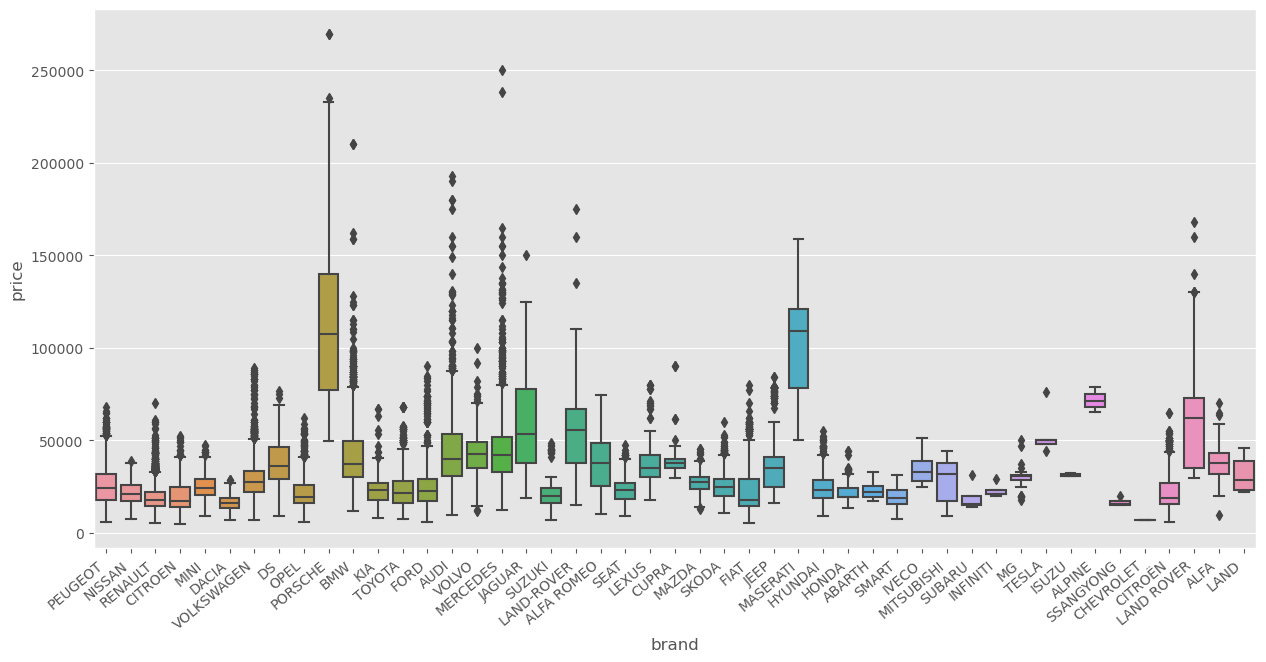

In [179]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='brand',y='price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [180]:
# plt.subplots(figsize=(20,10))
# ax=sns.swarmplot(x='year',y='price',data=car)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
# plt.show()

In [181]:
# sns.relplot(x='gear_box',y='price',data=car,height=7,aspect=1.5)

In [ ]:
# plt.subplots(figsize=(14,7))
# sns.boxplot(x='gear_box',y='price',data=car)

In [ ]:
# ax=sns.relplot(x='brand',y='price',data=car,hue='gear_box',size='year',height=7,aspect=2)
# ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [182]:
X=car[['model','brand','gear_box', 'year', 'trim', 'energy']]
y=car['price']

In [183]:
X

,model,brand,gear_box,year,trim,energy
0,2008,PEUGEOT,Automatique,2021,e-2008 136ch GT Pack,Electrique
1,Qashqai,NISSAN,Manuelle,2020,1.5 dCi 115ch N-Connecta Euro6d-T,Diesel
2,Captur,RENAULT,Manuelle,2018,0.9 TCe 90ch energy Business Euro6c,Essence
3,Kadjar,RENAULT,Manuelle,2021,1.5 Blue dCi 115ch Business - 21,Diesel
4,2008,PEUGEOT,Manuelle,2018,1.2 PureTech 130ch Crossway S&S,Essence
...,...,...,...,...,...,...
44343,308,PEUGEOT,Manuelle,2022,PURETECH 130CH S&S BVM6 ALLURE,Essence
44344,JUMPY,CITROËN,Manuelle,2019,FGN M BLUEHDI 120 S&S BVM6 BUSINESS,Diesel
44345,C3,CITROËN,Manuelle,2020,PURETECH 82 S&S BVM5 FEEL BUSINESS,Essence
44346,ROVER RANGE,LAND,Manuelle,2016,MARK IV ED4 150 2WD E-CAPABILITY PURE,Diesel


In [184]:
y.shape

(44348,)

### Applying Train Test Split

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#### Creating an OneHotEncoder object to contain all the possible categories

In [187]:
ohe=OneHotEncoder()
ohe.fit(X[['model','brand','gear_box','trim','energy','year']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [193]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['model','brand','gear_box','trim','energy','year']),remainder='passthrough')
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['107', '108', '2', '2008', '206+', '207', '207 Cc', '208', '3',
       '3 CABRIO', '3 CROSSBACK', '3008', '308', '308 CC', '308 SW',
       '308 Sw', '370z', '4', '4 CROSSBACK', '5', '500', '5008', '500L',
       '500X', '500c', '500l', '500l Living', '500x', '508',
       '508 Hybrid4', '508 SW', '508 Sw', '595',...
       'xDrive45eA 394ch M Sport 17cv'], dtype=object),
                                                           array(['Diesel', 'DieselM', 'Electrique', 'Essence', 'EssenceB',
       'EssenceM', 'GPL', 'Gnv', 'Gpl', 'Hyb Diesel rechargeable',
       'Hybride', 'Hybride Rechargeable', 'HybrideR'], dtype=object),
                                                           array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)]),
                               

#### Linear Regression Model

In [194]:
lr=LinearRegression()

#### Making a pipeline

In [195]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [196]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['107', '108', '2', '2008', '206+', '207', '207 Cc', '208', '3',
       '3 CABRIO', '3 CROSSBACK', '3008', '308', '308 CC', '308 SW',
       '308 Sw', '370z', '4', '4 CROSSBACK', '5', '500', '5008', '500L',
       '500X', '500c', '500l', '500l Living', '500x', '508...
                                                                            array(['Diesel', 'DieselM', 'Electrique', 'Essence', 'EssenceB',
       'EssenceM', 'GPL', 'Gnv', 'Gpl', 'Hyb Diesel rechargeable',
       'Hybride', 'Hybride Rechargeable', 'HybrideR'], dtype=object),
                                                                            array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)]),
               

In [197]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [200]:
r2_score(y_test,y_pred)

0.9241284229286261

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.80 as r2_score

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

260

In [ ]:
scores[np.argmax(scores)]

0.8041204733744746

In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Qashqai','NISSAN','Automatique']).reshape(1,3)))

array([30093.75711024])

#### The best model is found at a certain random state 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8041204733744746

In [ ]:
pickle.dump(pipe,open('CarPricePredict.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['model','brand','gear_box'],data=np.array(['Qashqai','NISSAN','Automatique']).reshape(1,3)))

array([29957.33746866])

In [ ]:
pipe.predict(pd.DataFrame(columns=['model','brand','gear_box'],data=np.array(['Qashqai','NISSAN','Automatique']).reshape(1,3)))

array([29957.33746866])